In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [40]:
df=pd.read_csv('/content/drive/MyDrive/heart_disease_health_indicators.csv')

In [ ]:
df = df.sample(n=20000, random_state=42)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 219620 to 125546
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   HeartDiseaseorAttack  10000 non-null  float64
 1   HighBP                10000 non-null  float64
 2   HighChol              10000 non-null  float64
 3   CholCheck             10000 non-null  float64
 4   BMI                   10000 non-null  float64
 5   Smoker                10000 non-null  float64
 6   Stroke                10000 non-null  float64
 7   Diabetes              10000 non-null  float64
 8   PhysActivity          10000 non-null  float64
 9   Fruits                10000 non-null  float64
 10  Veggies               10000 non-null  float64
 11  HvyAlcoholConsump     10000 non-null  float64
 12  AnyHealthcare         10000 non-null  float64
 13  NoDocbcCost           10000 non-null  float64
 14  GenHlth               10000 non-null  float64
 15  MentHlth     

In [ ]:
df.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.094400,0.428100,0.423300,0.963100,28.450800,0.445100,0.041600,0.290000,0.759100,0.638100,...,0.951000,0.086900,2.511600,3.184500,4.249500,0.167300,0.447800,8.017500,5.049300,6.076600
std,0.292399,0.494828,0.494107,0.188526,6.481403,0.497002,0.199683,0.691338,0.427651,0.480574,...,0.215879,0.281703,1.071065,7.374191,8.776158,0.373262,0.497293,3.043044,0.982429,2.071608
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,95.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


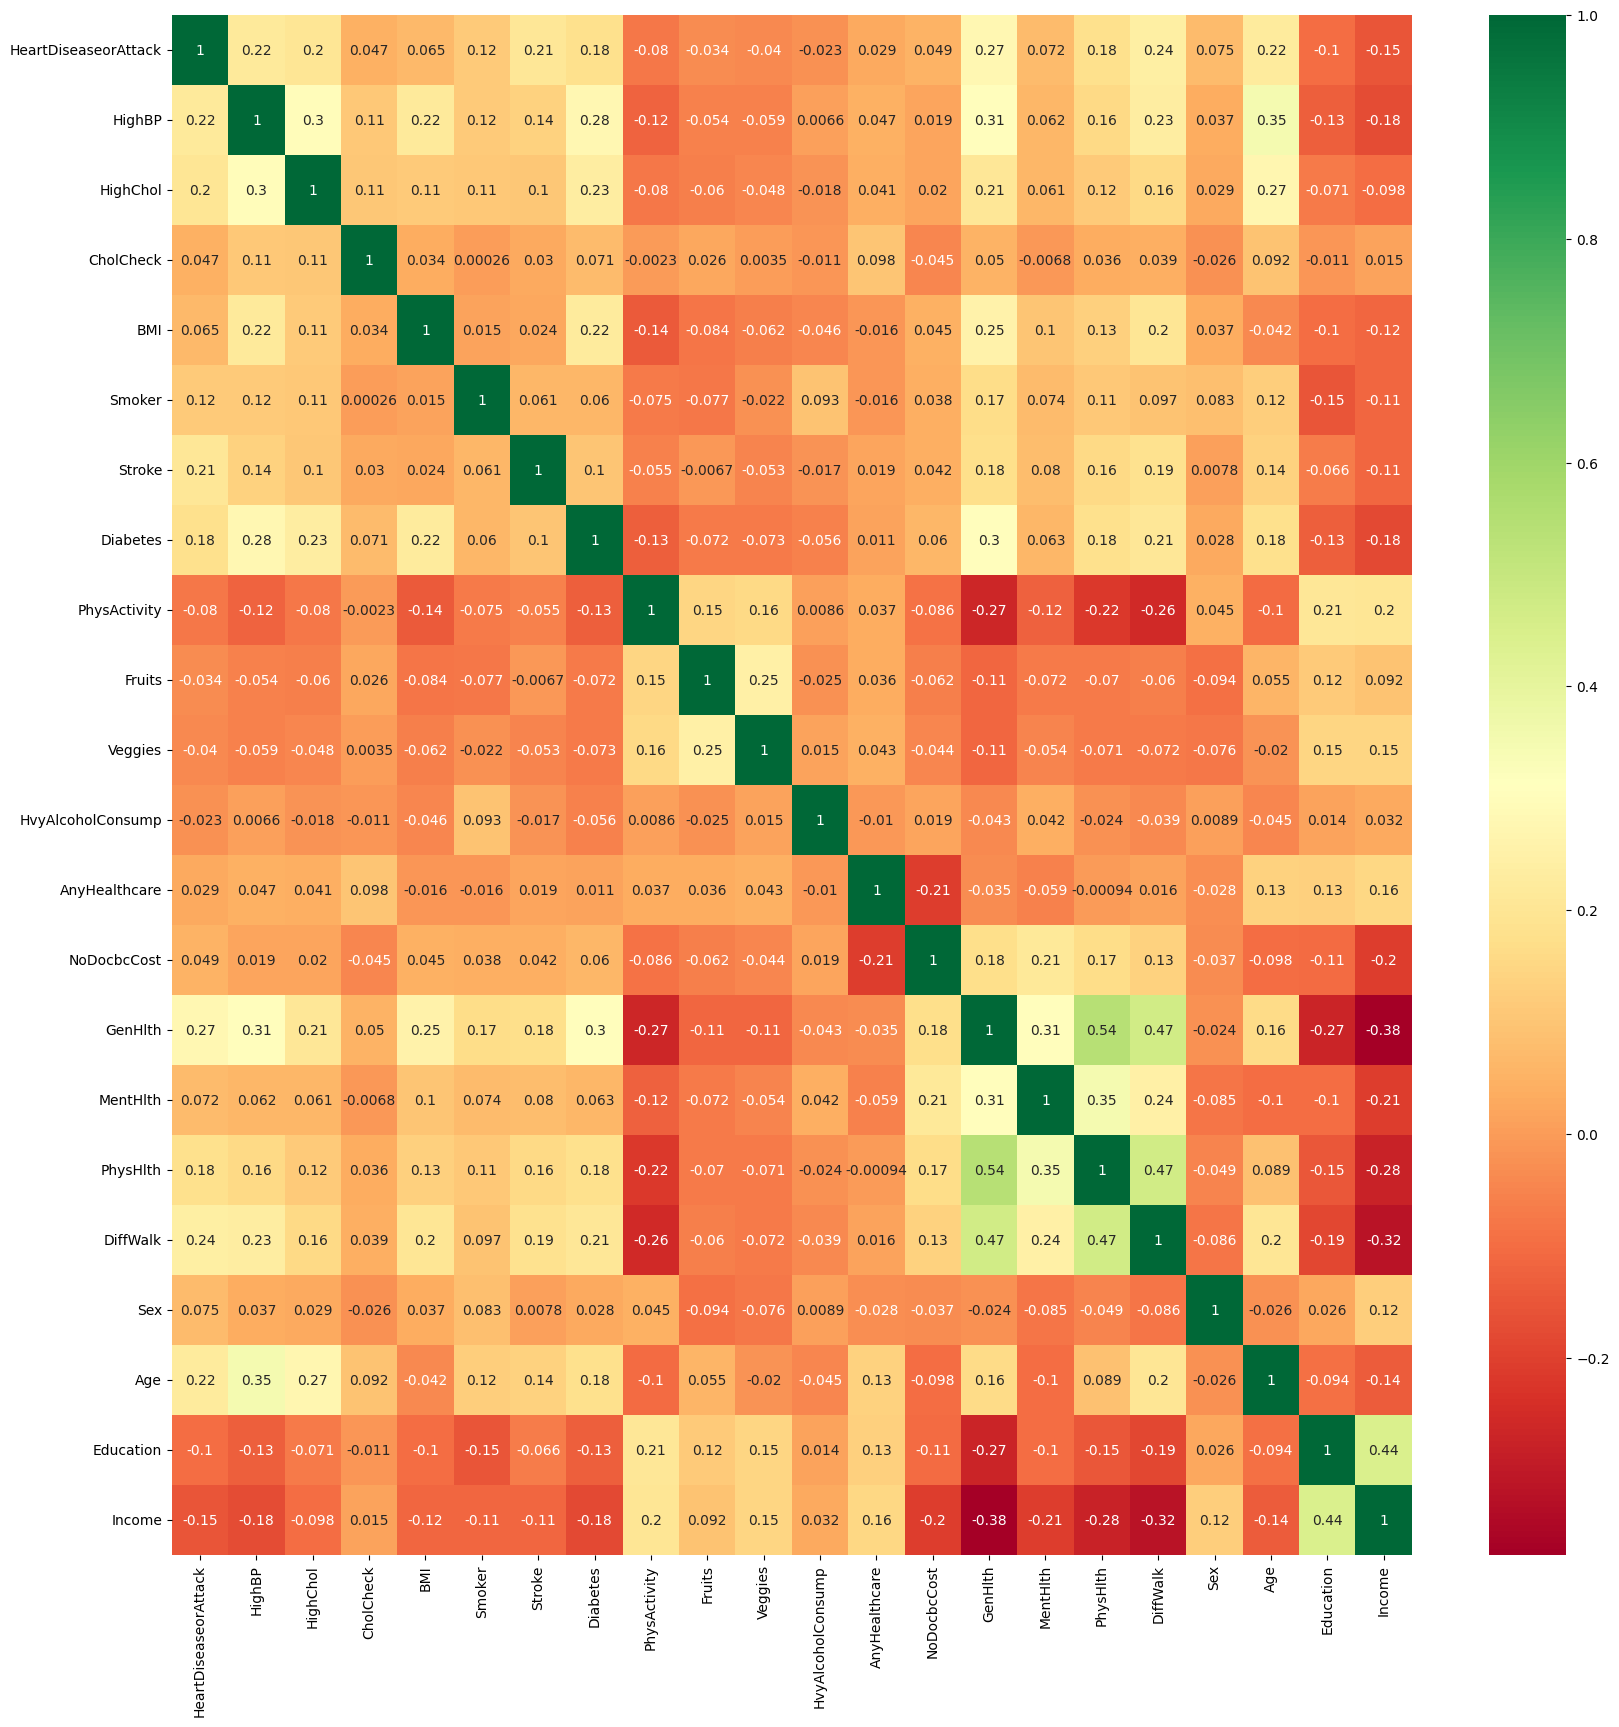

In [ ]:
import seaborn as sns
corrmat=df.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap='RdYlGn')

array([[<Axes: title={'center': 'HeartDiseaseorAttack'}>,
        <Axes: title={'center': 'HighBP'}>,
        <Axes: title={'center': 'HighChol'}>,
        <Axes: title={'center': 'CholCheck'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'Smoker'}>,
        <Axes: title={'center': 'Stroke'}>,
        <Axes: title={'center': 'Diabetes'}>,
        <Axes: title={'center': 'PhysActivity'}>,
        <Axes: title={'center': 'Fruits'}>],
       [<Axes: title={'center': 'Veggies'}>,
        <Axes: title={'center': 'HvyAlcoholConsump'}>,
        <Axes: title={'center': 'AnyHealthcare'}>,
        <Axes: title={'center': 'NoDocbcCost'}>,
        <Axes: title={'center': 'GenHlth'}>],
       [<Axes: title={'center': 'MentHlth'}>,
        <Axes: title={'center': 'PhysHlth'}>,
        <Axes: title={'center': 'DiffWalk'}>,
        <Axes: title={'center': 'Sex'}>, <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Education'}>,
        <Axes: title={'cente

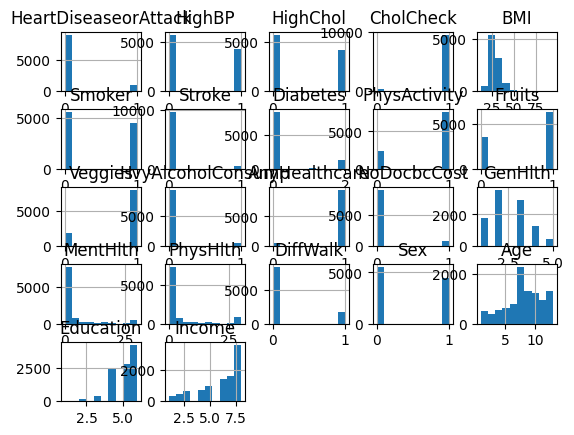

In [ ]:
df.hist()

<Axes: xlabel='HeartDiseaseorAttack', ylabel='count'>

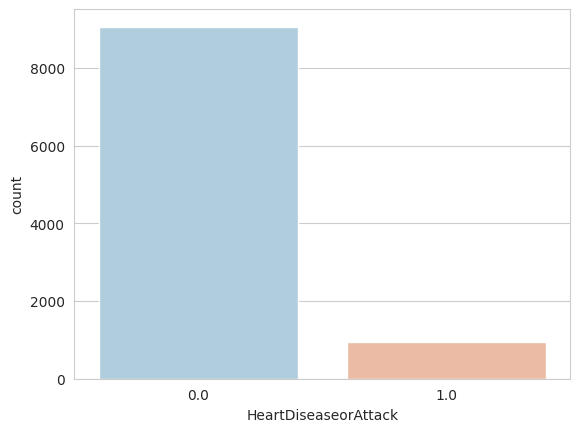

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='HeartDiseaseorAttack',data=df,palette='RdBu_r')

In [ ]:
dataset=pd.get_dummies(df,columns=['CholCheck','BMI','Veggies','AnyHealthcare','PhysHlth','DiffWalk','Sex','Education','Income'])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler=StandardScaler()
columns_to_scale=['HighBP','HighChol','Smoker','Stroke','Diabetes','PhysActivity','Fruits','HvyAlcoholConsump','GenHlth','MentHlth','Age']
dataset[columns_to_scale]=standardScaler.fit_transform(dataset[columns_to_scale])

In [ ]:
dataset.head()

,HeartDiseaseorAttack,HighBP,HighChol,Smoker,Stroke,Diabetes,PhysActivity,Fruits,HvyAlcoholConsump,NoDocbcCost,...,Education_5.0,Education_6.0,Income_1.0,Income_2.0,Income_3.0,Income_4.0,Income_5.0,Income_6.0,Income_7.0,Income_8.0
219620,0.0,-0.871481,-0.860167,-0.894800,-0.204655,-0.42301,-1.777077,0.759385,-0.245513,0.0,...,0,0,0,1,0,0,0,0,0,0
132821,0.0,1.147472,1.162565,-0.894800,-0.204655,-0.42301,0.562722,0.759385,-0.245513,0.0,...,0,1,0,0,0,0,0,1,0,0
151862,0.0,-0.871481,-0.860167,-0.894800,-0.204655,-0.42301,0.562722,0.759385,-0.245513,0.0,...,0,0,0,0,0,0,0,0,1,0
139717,0.0,-0.871481,-0.860167,1.117569,-0.204655,-0.42301,0.562722,-1.316855,4.073101,0.0,...,0,0,0,0,0,0,0,0,1,0
239235,0.0,-0.871481,1.162565,1.117569,-0.204655,-0.42301,-1.777077,0.759385,-0.245513,1.0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
y=dataset['HeartDiseaseorAttack']
x=dataset.drop(['HeartDiseaseorAttack'],axis=1)

In [ ]:
from sklearn.model_selection import cross_val_score
knn_scores=[]
for k in range(1,21):
  knn_classifier=KNeighborsClassifier(n_neighbors=k)
  score=cross_val_score(knn_classifier,x,y,cv=5)
  knn_scores.append(score.mean())

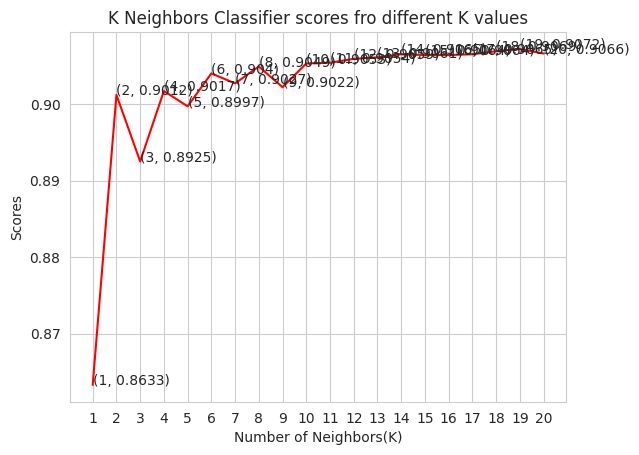

In [ ]:
plt.plot([k for k in range(1,21)],knn_scores,color='red')
for i in range(1,21):
  score_rounded=round(knn_scores[i-1],4)
  plt.text(i,score_rounded,(i,score_rounded))
plt.xticks([i for i in range(1,21)])
plt.xlabel('Number of Neighbors(K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores fro different K values')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
decision_tree_scores=[]
accuracy_scores=[]
for max_depth in range(1,21):
  dt_classifier=DecisionTreeClassifier(max_depth=max_depth,random_state=42)
  scores=cross_val_score(dt_classifier,x,y,cv=5)
  decision_tree_scores.append(scores.mean())
  dt_classifier.fit(x,y)
  y_pred=dt_classifier.predict(x)
  accuracy=accuracy_score(y,y_pred)
  accuracy_scores.append(accuracy)
print(f"Max Depth :{max_depth},Acuuracy Score: {accuracy:.4f}")

Max Depth :20,Acuuracy Score: 0.9919


In [ ]:
randomforest_classifier=RandomForestClassifier(n_estimators=10)
score=cross_val_score(randomforest_classifier,x,y,cv=10)

In [ ]:
score.mean()

0.9042000000000001

In [ ]:
knn_classifier=KNeighborsClassifier(n_neighbors=19)
score=cross_val_score(knn_classifier,x,y,cv=10)

In [ ]:
score.mean()

0.9062000000000001